In [495]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Univariate Linear Regression 

First we load the data.

In [496]:
data = pd.read_csv('ex1data1.txt', names = ["population", "profit"]) # load data

Now we extract the feature and target variables for regression.

In [497]:
X = data.drop('profit', axis=1) # extract feature variable
y = data['profit'] # extract target variable
m = len(y) # how many data-sets 

Lets take a look at the data.

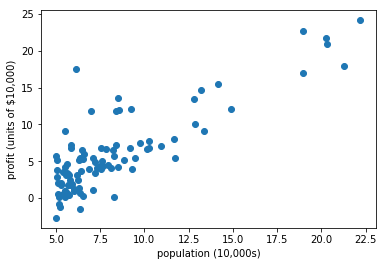

In [498]:
plt.scatter(X, y)
plt.xlabel('population (10,000s)')
plt.ylabel('profit (units of $10,000)')

Lets try using regression to fit a straight line to this data.

In [499]:
# could normalise this but not nessesary for 1 feature variable
# sigma = np.sqrt(X.var())
# mean = X.mean()
# X_norm = (X-mean)/sigma
# X_norm = np.insert(X_norm, 0, np.ones(m), axis=1) # insert column of 1s

We turn the dataframes in to matricies and add a column of ones for the $\theta_0$ intercept parameter.

In [500]:
X = X.as_matrix()
X = np.insert(X, 0, np.ones(m), axis=1) # insert column of 1s
y = y.as_matrix()

We now define our cost function to evaluate the quality of the fit. We use the sum of square residuals function for this.

In [501]:
def eval_cost_func(theta, X, y):
    """
    Calculates our sum of square residuals cost function
    """
    y_pred = np.sum(theta*X, axis=1) # theta vector multipied by X matrix and summed 
    # along the rows to calculate predicted y
    J = np.sum((y_pred - y)**2)/(2*m)
    return J

We can plot the contour plot of this cost function to get an idea where the minima is.

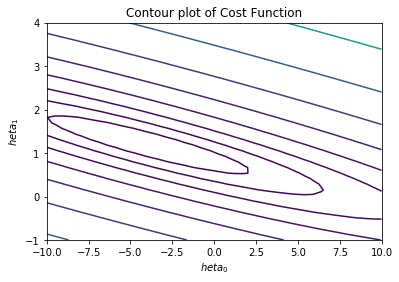

In [502]:
N = 40
theta0 = np.linspace(-10, 10, N)
theta1 = np.linspace(-1, 4, N)
J = np.zeros([N, N])
for i, t0 in enumerate(theta0):
    for j, t1 in enumerate(theta1):
        theta = np.array([t0, t1])
        J[j, i] = eval_cost_func(theta, X, y)

T0, T1 = np.meshgrid(theta0, theta1)

plt.figure()
CS = plt.contour(T0, T1, J, np.logspace(-2, 3, 20))
plt.title('Contour plot of Cost Function')
plt.xlabel('$\theta_0$')
plt.ylabel('$\theta_1$')

We will now implement gradient descent to find the minima of this cost function.

In [503]:
def gradient_descent(theta, X, y, alpha=0.008):
    m = len(y)
    y_pred = np.matmul(X, theta)
    resids = (y_pred-y)
    theta = theta - (alpha/m)*np.sum(resids*X.transpose(), axis=1)
    return theta

In [504]:
theta = np.array([0, 0]) # initialise theta to [0, 0]

J_hist = []
theta_hist = []
J_hist.append(eval_cost_func(theta, X, y))
theta_hist.append(theta)

N_iters = 3000

for iter in range(0, N_iters):
    theta = gradient_descent(theta, X, y)
    theta_hist.append(theta)
    J_hist.append(eval_cost_func(theta, X, y))

theta_hist = np.array(theta_hist)
J_hist = np.array(J_hist)

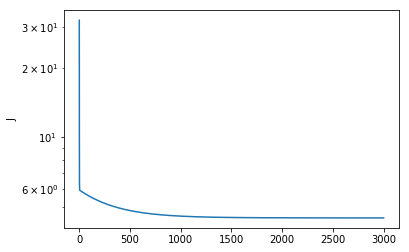

In [505]:
plt.semilogy(J_hist)
plt.ylabel('J')

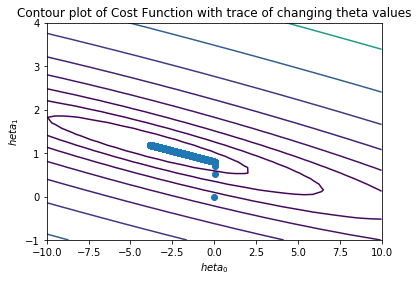

In [506]:
plt.figure()
CS = plt.contour(T0, T1, J, np.logspace(-2, 3, 20))
plt.title('Contour plot of Cost Function with trace of changing theta values')
plt.scatter(theta_hist[:, 0], theta_hist[:, 1])
plt.xlabel('$\theta_0$')
plt.ylabel('$\theta_1$')

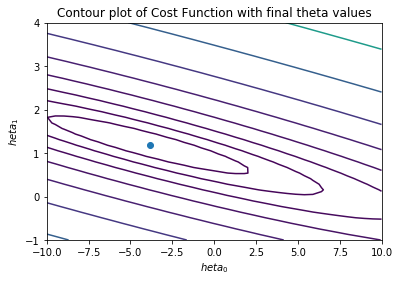

In [507]:
plt.figure()
CS = plt.contour(T0, T1, J, np.logspace(-2, 3, 20))
plt.title('Contour plot of Cost Function with final theta values')
plt.scatter(theta[0], theta[1])
plt.xlabel('$\theta_0$')
plt.ylabel('$\theta_1$')

# Multivariate Linear Regression 

In [508]:
data = pd.read_csv('ex1data2.txt', names = ["house_size", "no_bedrooms", "price"]) # load data

In [509]:
X = data.drop('price', axis=1) # extract feature variable
y = data['price'] # extract target variable
m = len(y) # how many data-sets 

In [510]:
X = (X.as_matrix()).astype(float)
y = (y.as_matrix()).astype(float)

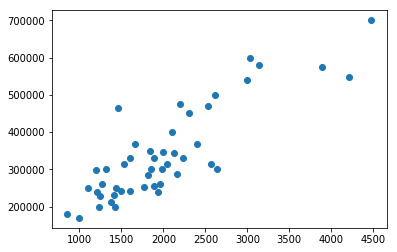

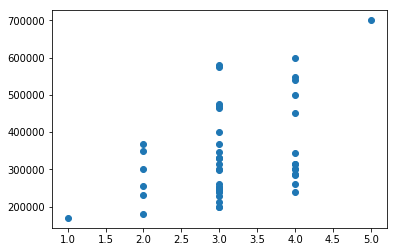

In [511]:
plt.scatter(X[:, 0], y)
plt.show()
plt.scatter(X[:, 1], y)

## Linear Regression with Gradient Descent

We first normalise the features such that they are all on the same relative scale

In [512]:
def normalise_data(X):
    mu = np.mean(X, axis=0)
    sigma = np.var(X, axis=0)**0.5
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma
    
X_norm, mu, sigma = normalise_data(X)
X_norm = np.insert(X_norm, 0, np.ones(m), axis=1) # insert column of 1s

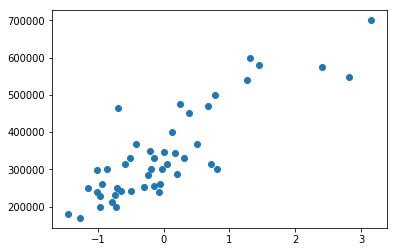

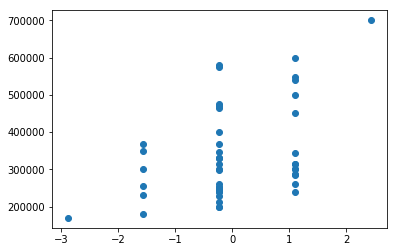

In [513]:
plt.scatter(X_norm[:, 1], y)
plt.show()
plt.scatter(X_norm[:, 2], y)

We now write functions to evaluate the cost function and perform gradient descent updates to $\vec{\theta}$ to find the minima of the cost function.

In [514]:
def eval_cost_func(theta, X, y):
    """
    Calculates our sum of square residuals cost function
    """
    m = len(y)
    y_pred = np.matmul(X, theta) 
    J = np.dot((y_pred - y), (y_pred - y))/(2*m)
    # J = np.sum((y_pred-y)**2)/(2*m)
    return J

In [515]:
def gradient_descent_iteration(theta, X, y, alpha=0.01):
    """
    Performs a single iteration of the gradient descent algorithm
    """
    y_pred = np.matmul(X, theta)
    resids = (y_pred - y)
    theta = theta - (alpha/m)*np.matmul(resids, X)
    return theta

In [516]:
def gradient_descent(theta, X, y, alpha=0.01, num_iters=400):
    """
    Performs num_iters iterations of the gradient descent algorithm, 
    recording the values of theta and J, the cost function, along
    the way.
    """
    # next 4 lines create arrays to store the values of theta and J
    # and store the initial values
    theta_hist = np.empty([num_iters+1, 3])
    J_hist = np.empty(num_iters+1)
    theta_hist[0] = theta
    J_hist[0] = eval_cost_func(theta, X, y)

    for iteration in range(num_iters):
        theta = gradient_descent_iteration(theta, X, y, alpha=0.01)        
        theta_hist[iteration+1] = theta 
        J_hist[iteration+1] = eval_cost_func(theta, X, y)      
  
    theta_hist = np.array(theta_hist)
    J_hist = np.array(J_hist)
    return theta, J_hist, theta_hist

We now perform our gradient descent for 500 steps to find $\vec{\theta}$

In [517]:
theta = np.array([0, 0, 0]) # initialise theta to [0, 0]

theta, J_hist, theta_hist = gradient_descent(theta, X_norm, y, alpha=0.01, num_iters=500)

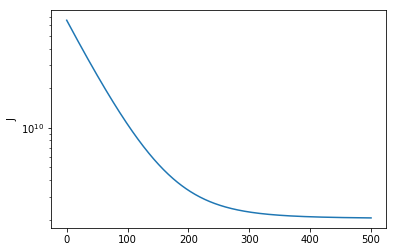

In [518]:
plt.semilogy(J_hist)
plt.ylabel('J')

Our $\vec{\theta}$ is as follows:

In [519]:
theta

array([  3.38175984e+05,   1.03032124e+05,  -2.02325233e+02])

Lets predict our outputs on the data we have trained to check it looks sensible.

In [520]:
y_pred = np.matmul(X_norm, theta)

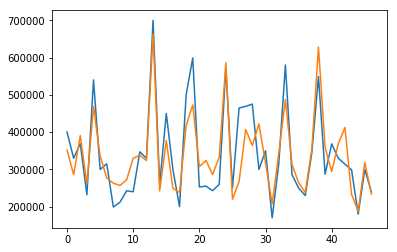

In [521]:
plt.plot(y)
plt.plot(y_pred)

These look like a fairly good match.

Now we have found our $\vec{\theta}$ lets use it to predict the price of a new house with 1650 sq ft and 3 bedrooms

In [522]:
x_new = np.array([1650, 3])

In [523]:
x_new_norm = (x_new - mu)/sigma
x_new_norm = np.insert(x_new_norm, 0, np.ones(1), axis=0) # insert a 1

In [524]:
x_new_norm

array([ 1.        , -0.44604386, -0.22609337])

In [525]:
price = sum(theta*x_new_norm)

In [526]:
print("Predicted price = ${:.2f}".format(price))

Predicted price = $292264.88


## Normal Equation 

Now we use the normal equation to directly solve for $\vec{\theta}$

In [527]:
X = np.insert(X, 0, np.ones(m), axis=1) # insert column of 1s

In [528]:
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), X.transpose()), y)

We have solved for $\vec{\theta}$ in a single step. The values will be different from that calculated from gradient descent as our feature variables are not normalised in this case.

In [529]:
theta

array([ 89597.9095428 ,    139.21067402,  -8738.01911233])

If we now predict the price we find it matches what we found with gradient descent but didn't require 500 iterations.

In [530]:
x_new = np.array([1650, 3])
x_new = np.insert(x_new, 0, np.ones(1), axis=0) # insert a 1

price = sum(theta*x_new)

print("Predicted price = ${:.2f}".format(price))

Predicted price = $293081.46


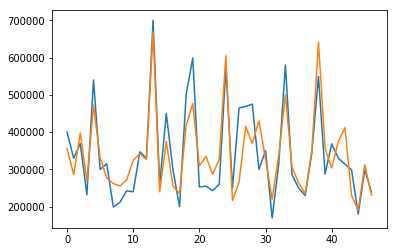

In [531]:
y_pred = np.matmul(X, theta)
plt.plot(y)
plt.plot(y_pred)

## Using Scikit learns linear regression model

We now perform this linear regression with the scikit learn package for comparison, we find that it gets exactly the same answer as the normal equation, likely because it is using the normal equation to perform this regression since we only have 2 features. Gradient descent only outperforms the normal equation when $n$, the number of features, is something like above 1000.

In [532]:
from sklearn import linear_model

In [533]:
# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)

X = data.drop('price', axis=1) # extract feature variable
y = data['price'] # extract target variable
# Train the model using the training sets
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [534]:
regr.intercept_

89597.909542797541

In [535]:
regr.coef_

array([  139.21067402, -8738.01911233])

In [537]:
x_new = np.array([1650, 3])

In [538]:
price = regr.predict([x_new])[0]

In [539]:
print("Predicted price = ${:.2f}".format(price))

Predicted price = $293081.46


In [540]:
y_pred = regr.predict(X)

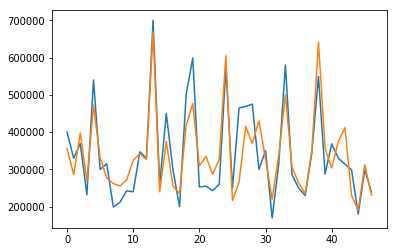

In [541]:
plt.plot(y)
plt.plot(y_pred)